## Задание 1:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


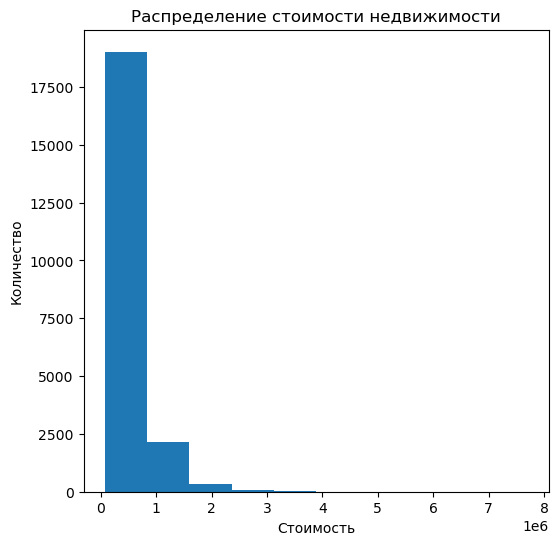

In [3]:
plt.figure(figsize=(6, 6))
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Text(0, 0.5, 'Кол-во домов')

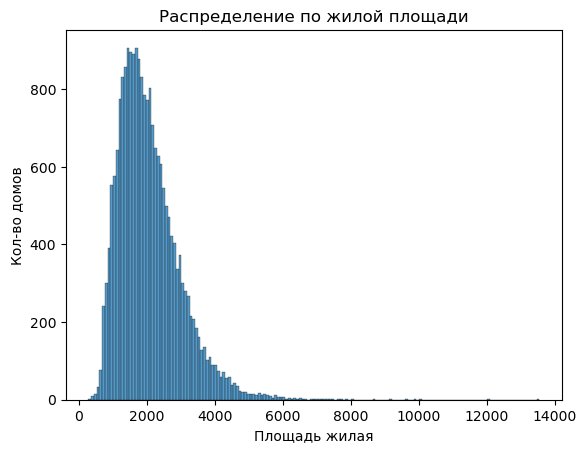

In [23]:
sns.histplot(x=df['sqft_living'])
plt.title('Распределение по жилой площади')
plt.xlabel('Площадь жилая')
plt.ylabel('Кол-во домов')

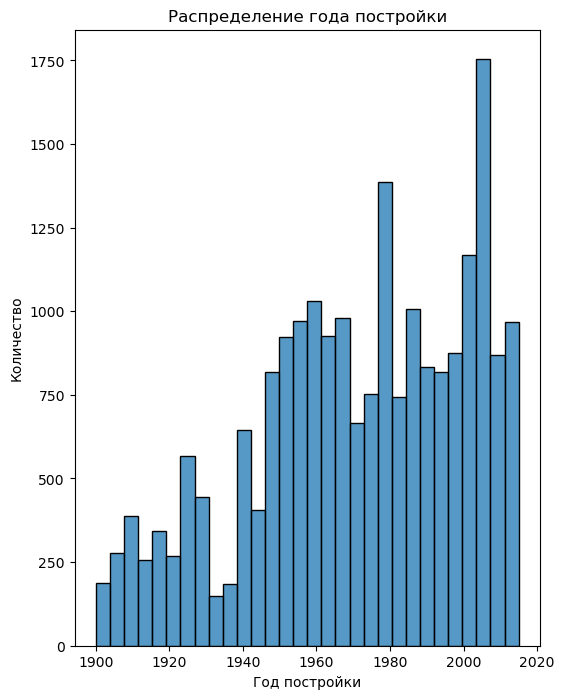

In [6]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Text(0, 0.5, 'Кол-во домов')

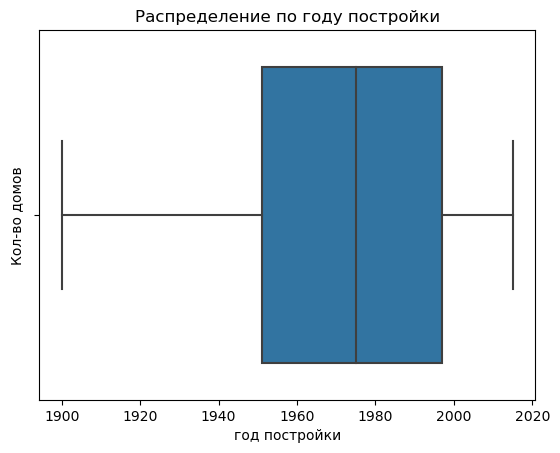

In [22]:
sns.boxplot(x=df['yr_built'])
plt.title('Распределение по году постройки')
plt.xlabel('год постройки')
plt.ylabel('Кол-во домов')

## Задание 2:

### 2.1 Изучите распределение домов от наличия вида на набережную<br>Постройте график<br>Сделайте выводы

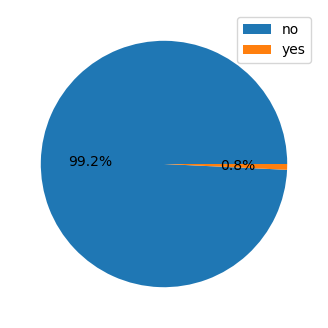

In [7]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

### 2.2 Изучите распределение этажей домов

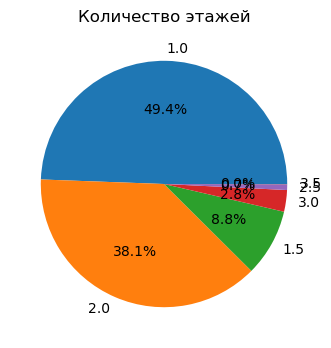

In [8]:
data = df['floors'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

### 2.2 Изучите распределение состояния домов

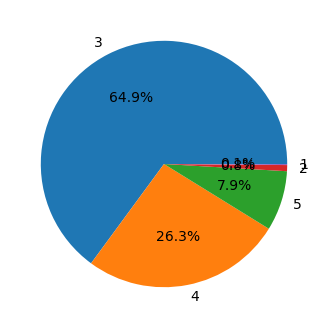

In [9]:
data = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

## Задание 3:

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Text(0.5, 0, 'Состояние дома')

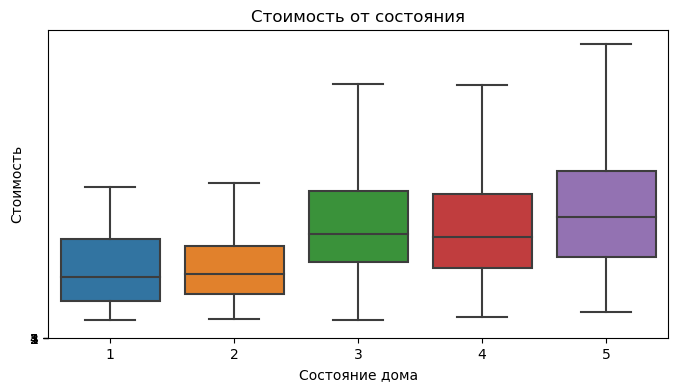

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['condition'], y=df['price'], showfliers=False)
plt.title('Стоимость от состояния')
plt.yticks([1,2,3,4,5])
plt.ylabel('Стоимость')
plt.xlabel('Состояние дома')
# по диаграмме видно, что дома в состоянии 1-2 заметно дешевле домов в состоянии 3-5, 
# причем цены на дома в удовлетворительном и хорошем состоянии примерно одинаковы, 
# дома же в отличном состоянии имеют самую высокую стоимость.

по диаграмме видно, что дома в состоянии 1-2 заметно дешевле домов в состоянии 3-5, 
причем цены на дома в удовлетворительном и хорошем состоянии примерно одинаковы, 
дома же в отличном состоянии имеют самую высокую стоимость.

<AxesSubplot:>

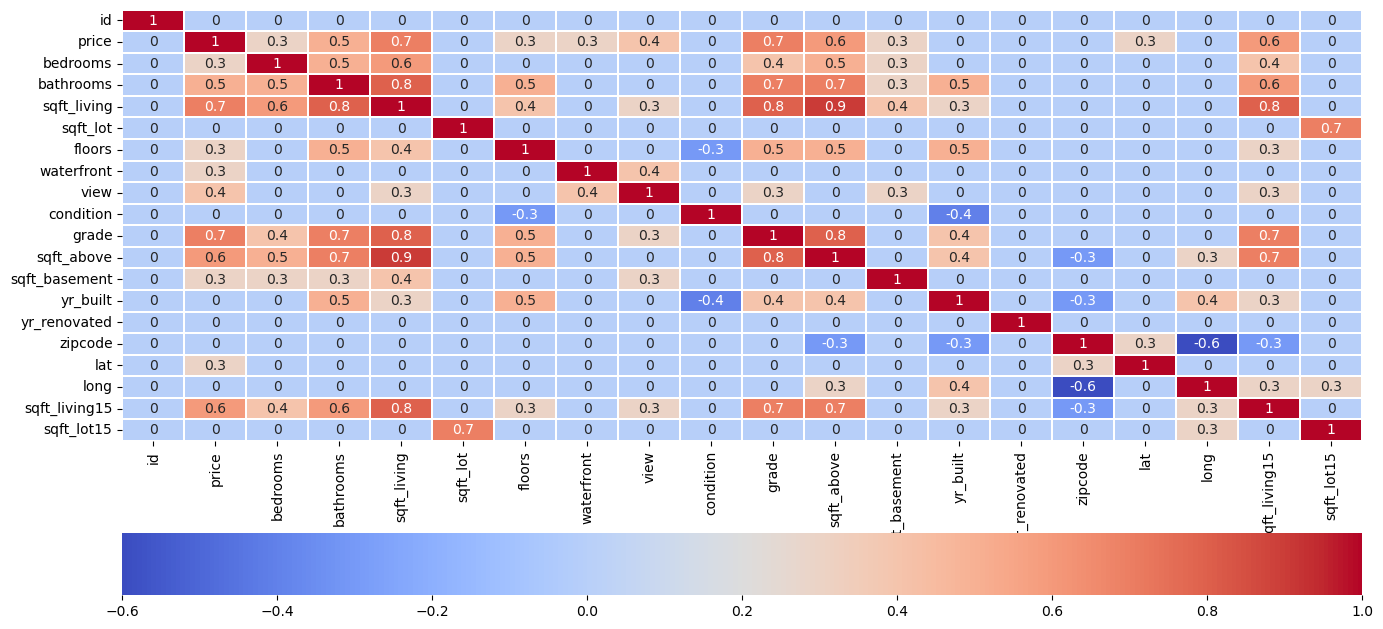

In [15]:
df.head()
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True,fmt='.1g', linewidths=.2, cmap='coolwarm', cbar_kws= {'orientation': 'horizontal'} )

тепловая карта показывает нам что цена домов имеет достаточно сильную прямую линейную связь с жилой площадью и оценкой дома
среднюю прямую взаимосвязь цена дома имеет с площадью чердака/мансарды и площадью живущих рядом 15 соседей, а так же количеством ванных комнат

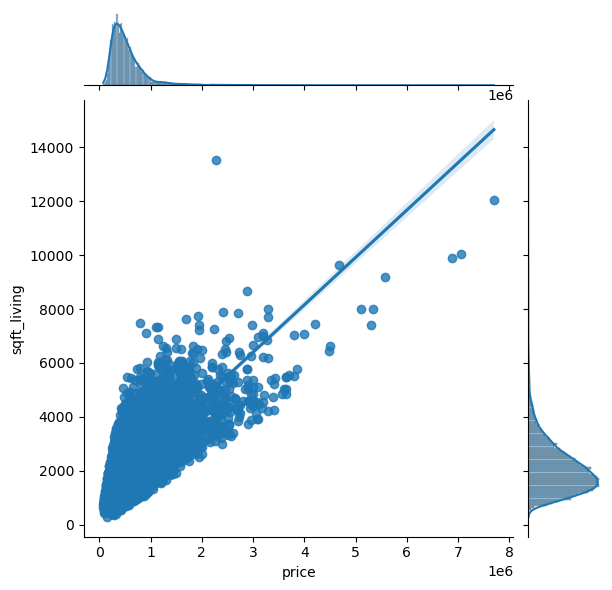

In [16]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Чем больше жилплощадь дома, тем выше его стоимость

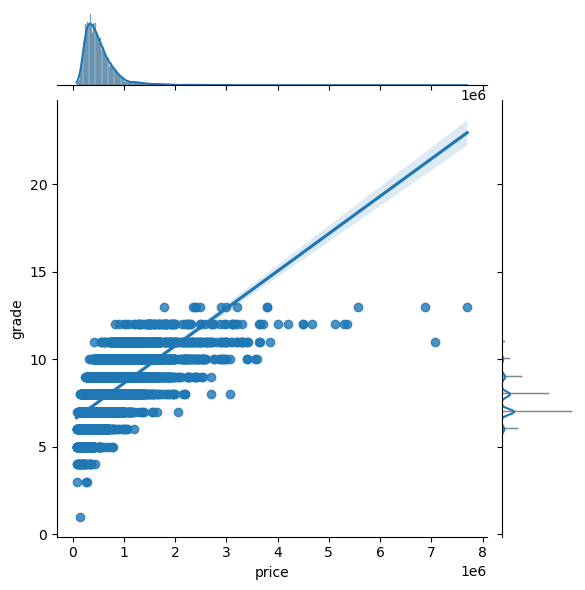

In [17]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Чем выше качество конструкции и дизайна дома, тем выше его стоимость

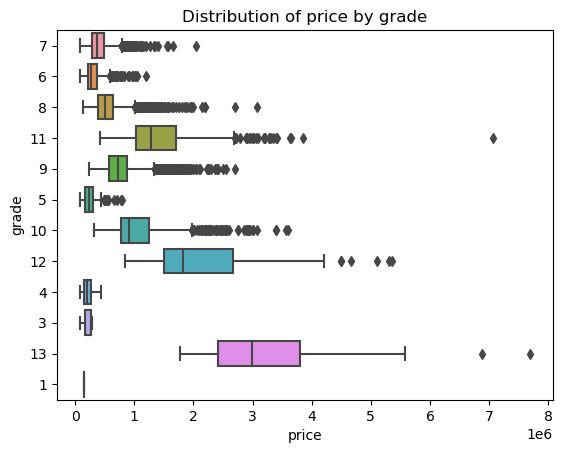

In [18]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

Наибольшую стоимость имеют дома с оценкой конструкции и дизайна 13

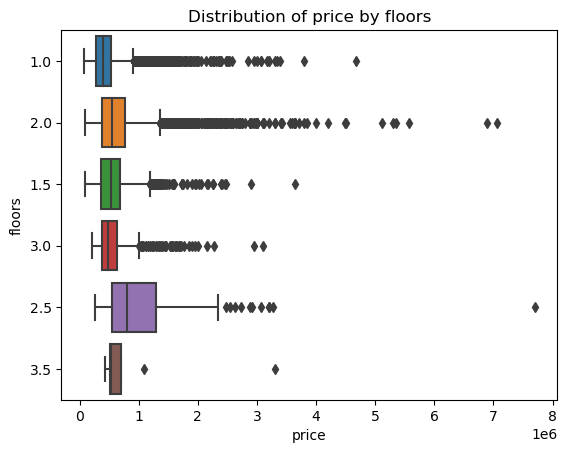

In [19]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

Наибольшую стоимость имеют дома с количеством этажей 2,5

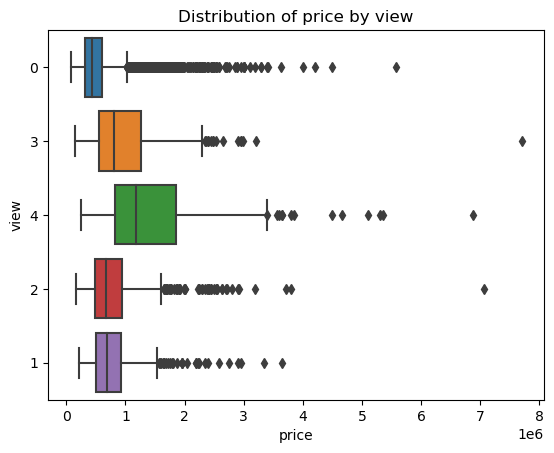

In [20]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

Наибольшую стоимость имеют дома с оценкой вида 4